https://docs.qubole.com/en/latest/user-guide/notebooks-and-dashboards/notebooks/jupyter-notebooks/running-jupy-notebooks.html

In [64]:
%run lime.ipynb

lime.ipynb imported.


In [69]:
import matplotlib.pyplot as plt
from PIL import Image
import torch.nn as nn
import numpy as np

import torch
from torchvision import models, transforms
from torch.autograd import Variable
import torch.nn.functional as F

from tensorflow.keras.utils import load_img

import anvil.server, anvil.media

  0%|          | 0/100 [00:00<?, ?it/s]

Exception in thread Thread-21 (heartbeat_until_reopened):
Traceback (most recent call last):
  File "C:\Users\ithin\AppData\Roaming\Python\Python310\site-packages\anvil\server.py", line 401, in call
    return _do_call(args, kwargs, fn_name=fn_name)
  File "C:\Users\ithin\AppData\Roaming\Python\Python310\site-packages\anvil\server.py", line 393, in _do_call
    return _threaded_server.do_call(args, kwargs, fn_name=fn_name, live_object=live_object)
  File "C:\Users\ithin\AppData\Roaming\Python\Python310\site-packages\anvil\_threaded_server.py", line 429, in do_call
    raise error_from_server
anvil._server.AnvilWrappedError: 'Connection to Anvil Uplink server lost'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Python310\lib\threading.py", line 1009, in _bootstrap_inner
    self.run()
  File "C:\Python310\lib\threading.py", line 946, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\ithin\AppData\Ro

Anvil websocket closed (code 1006, reason=Going away)
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Published" as SERVER


Exception in thread Thread-36 (heartbeat_until_reopened):
Traceback (most recent call last):
  File "C:\Users\ithin\AppData\Roaming\Python\Python310\site-packages\anvil\server.py", line 401, in call
    return _do_call(args, kwargs, fn_name=fn_name)
  File "C:\Users\ithin\AppData\Roaming\Python\Python310\site-packages\anvil\server.py", line 393, in _do_call
    return _threaded_server.do_call(args, kwargs, fn_name=fn_name, live_object=live_object)
  File "C:\Users\ithin\AppData\Roaming\Python\Python310\site-packages\anvil\_threaded_server.py", line 429, in do_call
    raise error_from_server
anvil._server.AnvilWrappedError: 'Connection to Anvil Uplink server lost'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Python310\lib\threading.py", line 1009, in _bootstrap_inner
    self.run()
  File "C:\Python310\lib\threading.py", line 946, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\ithin\AppData\Ro

Anvil websocket closed (code 1006, reason=Going away)
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Published" as SERVER


Exception in thread Thread-39 (heartbeat_until_reopened):
Traceback (most recent call last):
  File "C:\Users\ithin\AppData\Roaming\Python\Python310\site-packages\anvil\server.py", line 401, in call
    return _do_call(args, kwargs, fn_name=fn_name)
  File "C:\Users\ithin\AppData\Roaming\Python\Python310\site-packages\anvil\server.py", line 393, in _do_call
    return _threaded_server.do_call(args, kwargs, fn_name=fn_name, live_object=live_object)
  File "C:\Users\ithin\AppData\Roaming\Python\Python310\site-packages\anvil\_threaded_server.py", line 429, in do_call
    raise error_from_server
anvil._server.AnvilWrappedError: 'Connection to Anvil Uplink server lost'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Python310\lib\threading.py", line 1009, in _bootstrap_inner
    self.run()
  File "C:\Python310\lib\threading.py", line 946, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\ithin\AppData\Ro

Anvil websocket closed (code 1006, reason=Going away)
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Published" as SERVER


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [54]:
anvil.server.connect("server_Z2TJZAQV66QSSNBWMV4L4S4A-SDDDJFHQEVJ3JDQW")

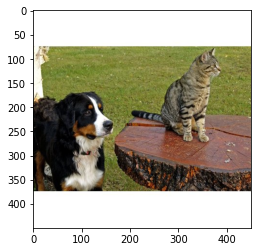

In [55]:
def get_image(path):
    with open(os.path.abspath(path), 'rb') as f:
        with Image.open(f) as img:
            return img.convert('RGB') 
        
img = get_image('./exploration/data/dogs.png')
plt.imshow(img)

In [56]:
def get_pil_transform(): 
    transf = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop(224)
    ])    

    return transf

def get_preprocess_transform():
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225])     
    transf = transforms.Compose([
        transforms.ToTensor(),
        normalize
    ])    

    return transf    

pill_transf = get_pil_transform()
preprocess_transform = get_preprocess_transform()

model = models.inception_v3(pretrained=True)

idx2label, cls2label, cls2idx = [], {}, {}
with open(os.path.abspath('./exploration/data/imagenet_class_index.json'), 'r') as read_file:
    class_idx = json.load(read_file)
    idx2label = [class_idx[str(k)][1] for k in range(len(class_idx))]
    cls2label = {class_idx[str(k)][0]: class_idx[str(k)][1] for k in range(len(class_idx))}
    cls2idx = {class_idx[str(k)][0]: k for k in range(len(class_idx))}    

C:\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [57]:
def get_pil_transform(): 
    transf = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop(224)
    ])    

    return transf

def get_preprocess_transform():
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225])     
    transf = transforms.Compose([
        transforms.ToTensor(),
        normalize
    ])    

    return transf    

def batch_predict(images):
    model.eval()
    batch = torch.stack(tuple(preprocess_transform(i) for i in images), dim=0)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    batch = batch.to(device)
    
    logits = model(batch)
    probs = F.softmax(logits, dim=1)
    return probs.detach().cpu().numpy()

test_pred = batch_predict([pill_transf(img)])

In [66]:
"""
anv_img = anvil.BlobMedia(content_type="image/png", content=img.tobytes(), name="explain.png")
img_explain = server_explain(anv_img)
"""

'\nanv_img = anvil.BlobMedia(content_type="image/png", content=img.tobytes(), name="explain.png")\nimg_explain = server_explain(anv_img)\n'

In [68]:
@anvil.server.callable
def server_explain(file): 
    with anvil.media.TempFile(file) as filename:
        img = load_img(filename)
        img_byte_arr = explain(pill_transf(img), batch_predict, num_samples=100)
        anvil_img = anvil.BlobMedia(content_type="image/png", content=img_byte_arr, name="explain.png")
        return anvil_img

In [ ]:
type(img_explain)

In [ ]:
#im = Image.fromarray((img_explain*255).astype('uint8'), mode='RGB')

In [71]:
@anvil.server.callable
def classify(file, give_explanation=True, num_samples=100): 
    if give_explanation: return 0.3, server_explain(file)
    else: return 0.3

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]